In [ ]:
import numpy as np
import matplotlib
from matplotlib import ticker, font_manager
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as patches
from matplotlib.patches import Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec

import astropy
import astropy.units as u
import astropy.constants as const
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord, Angle

from reproject import reproject_interp

import warnings
warnings.filterwarnings("ignore", category=astropy.wcs.wcs.FITSFixedWarning)

c_light = const.c.cgs.value/1e5

In [2]:
# Register the font
font_path = '/usr/share/fonts/liberation-sans/LiberationSans-Regular.ttf'
font_manager.fontManager.addfont(font_path)

# Get the actual family name (it must match the internal font name)
liberation = font_manager.FontProperties(fname=font_path)
font_name = liberation.get_name()  # usually "Liberation Sans"
print(font_name)

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# Set it globally
plt.rcParams['font.family'] = font_name
plt.rcParams['font.sans-serif'] = [font_name]

plt.rcParams.update({
    'axes.linewidth': 0.5,      # axes spines
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'xtick.major.width': 0.5,
    'ytick.major.width': 0.5,
    'xtick.minor.width': 0.3,
    'ytick.minor.width': 0.3,
})

Liberation Sans


In [4]:
hdu_cont = fits.open('../../../ALMA_continuum_new.fits')[0]
head_cont = hdu_cont.header
dat_cont = hdu_cont.data
std_cont = np.std(dat_cont[200:300,200:300])
pix_cont = head_cont['CDELT2']*3600
std_cont

np.float32(4.289794e-05)

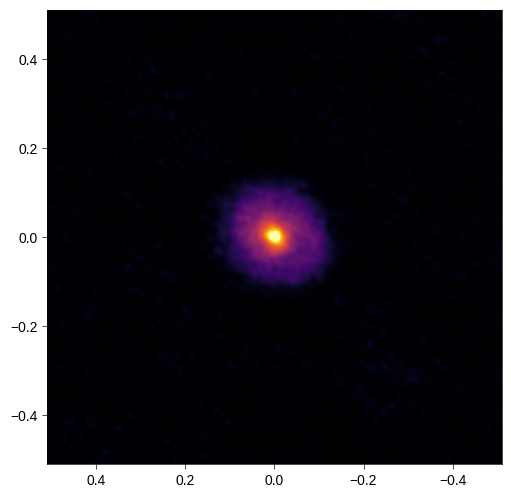

In [5]:
a, b = np.where(dat_cont == np.nanmax(dat_cont))

alma_max_skycoord = SkyCoord.from_pixel(b[0], a[0], WCS(head_cont))
alma_max_radec = [alma_max_skycoord.ra.value, alma_max_skycoord.dec.value]

cont_cut = dat_cont[a[0]-100:a[0]+101, b[0]-100:b[0]+101]
fig, ax = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
ax.imshow(cont_cut, origin='lower', cmap='inferno', vmin=0, vmax=3e-3, extent=[100*pix_cont, -100*pix_cont, -100*pix_cont, 100*pix_cont])

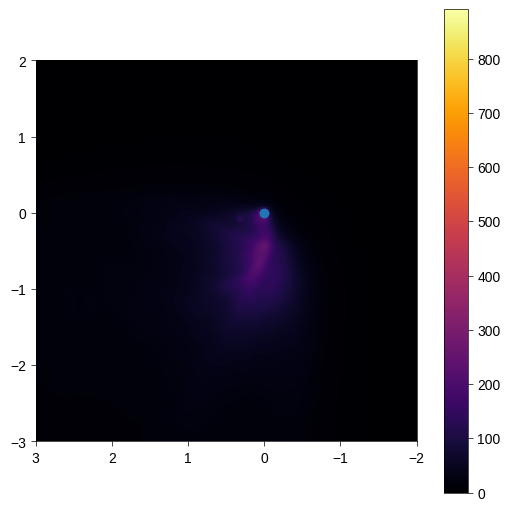

In [6]:
hdu_cont_short = fits.open('nircam_210m_cut.fits')[0]
head_cont_short = hdu_cont_short.header
dat_cont_short = hdu_cont_short.data
pix_cont_short = head_cont_short['CDELT2']*3600
wcs_cont_short = WCS(head_cont_short)

ny, nx = head_cont_short["NAXIS2"], head_cont_short["NAXIS1"]

# Generate pixel indices for X and Y axes
x_pixels = np.arange(nx)  # Column indices
y_pixels = np.arange(ny)  # Row indices

# Convert to RA, Dec
ra_array, _ = wcs_cont_short.pixel_to_world_values(x_pixels, np.ones(nx))
_, dec_array = wcs_cont_short.pixel_to_world_values(np.ones(ny), y_pixels)

if ra_array[0]<0:
    ra_array+=360


x_cont_short = (ra_array-alma_max_radec[0])*3600
y_cont_short = (dec_array-alma_max_radec[1])*3600

fig, ax = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)

plt.imshow(dat_cont_short, origin='lower', cmap='inferno', extent=[x_cont_short[0], x_cont_short[-1], y_cont_short[0], y_cont_short[-1]])
plt.colorbar()
plt.xlim(3, -2)
plt.ylim(-3, 2)
plt.scatter(0, 0)



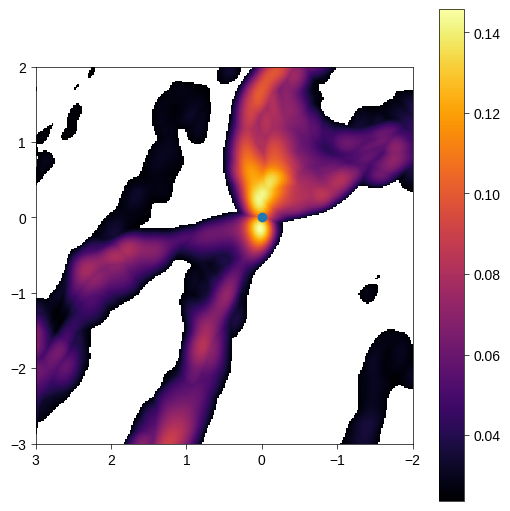

In [7]:
hdu_CO_taper = fits.open('CO_taper_mom8.fits')[0]
head_CO_taper = hdu_CO_taper.header
dat_CO_taper = hdu_CO_taper.data
pix_CO_taper = head_CO_taper['CDELT2']*3600
wcs_CO_taper = WCS(head_CO_taper)

ny, nx = head_CO_taper["NAXIS2"], head_CO_taper["NAXIS1"]

# Generate pixel indices for X and Y axes
x_pixels = np.arange(nx)  # Column indices
y_pixels = np.arange(ny)  # Row indices

# Convert to RA, Dec
ra_array, _ = wcs_CO_taper.pixel_to_world_values(x_pixels, np.ones(nx))
_, dec_array = wcs_CO_taper.pixel_to_world_values(np.ones(ny), y_pixels)

if ra_array[0]<0:
    ra_array+=360


x_CO_taper = (ra_array-alma_max_radec[0])*3600
y_CO_taper = (dec_array-alma_max_radec[1])*3600

#dat_CO_taper[dat_CO_taper<0.035] = np.nan

fig, ax = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)

plt.imshow(dat_CO_taper, origin='lower', cmap='inferno', extent=[x_CO_taper[0], x_CO_taper[-1], y_CO_taper[0], y_CO_taper[-1]])
plt.colorbar()
plt.xlim(3, -2)
plt.ylim(-3, 2)
plt.scatter(0, 0)



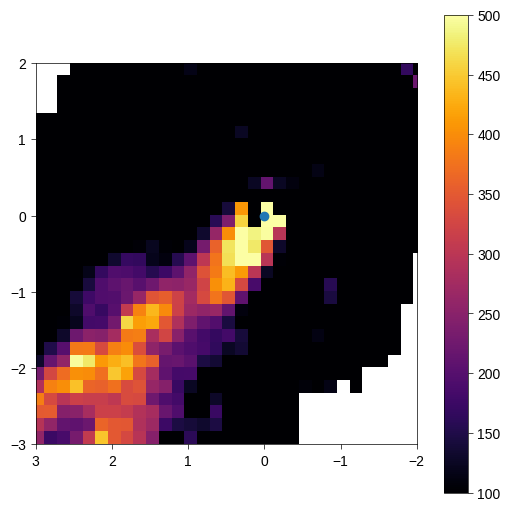

In [8]:
hdu_H2_long = fits.open('H2_mom82.fits')[0]
head_H2_long = hdu_H2_long.header
dat_H2_long = hdu_H2_long.data
pix_H2_long = head_H2_long['CDELT2']*3600
wcs_H2_long = WCS(head_H2_long)

ny, nx = head_H2_long["NAXIS2"], head_H2_long["NAXIS1"]

# Generate pixel indices for X and Y axes
x_pixels = np.arange(nx)  # Column indices
y_pixels = np.arange(ny)  # Row indices

# Convert to RA, Dec
ra_array, _ = wcs_H2_long.pixel_to_world_values(x_pixels, np.ones(nx))
_, dec_array = wcs_H2_long.pixel_to_world_values(np.ones(ny), y_pixels)

if ra_array[0]<0:
    ra_array+=360


x_H2_long = (ra_array-alma_max_radec[0])*3600
y_H2_long = (dec_array-alma_max_radec[1])*3600

fig, ax = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)

plt.imshow(dat_H2_long, origin='lower', cmap='inferno', vmin = 100, vmax = 500, extent=[x_H2_long[0], x_H2_long[-1], y_H2_long[0], y_H2_long[-1]])
plt.colorbar()
plt.xlim(3, -2)
plt.ylim(-3, 2)
plt.scatter(0, 0)



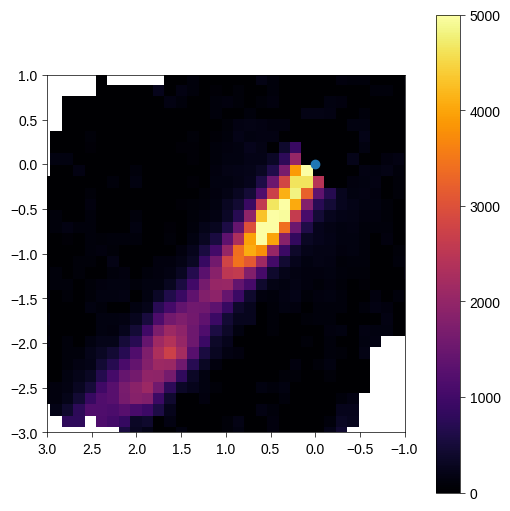

In [9]:
hdu_Fe = fits.open('Fe_mom8.fits')[0]
#hdu_Fe = fits.open('Fe_mom8_long.fits')[0]
head_Fe = hdu_Fe.header
dat_Fe = hdu_Fe.data
pix_Fe = head_Fe['CDELT2']*3600
wcs_Fe = WCS(head_Fe)

ny, nx = head_Fe["NAXIS2"], head_Fe["NAXIS1"]

# Generate pixel indices for X and Y axes
x_pixels = np.arange(nx)  # Column indices
y_pixels = np.arange(ny)  # Row indices

# Convert to RA, Dec
ra_array, _ = wcs_Fe.pixel_to_world_values(x_pixels, np.ones(nx))
_, dec_array = wcs_Fe.pixel_to_world_values(np.ones(ny), y_pixels)

if ra_array[0]<0:
    ra_array+=360


x_Fe = (ra_array-alma_max_radec[0])*3600
y_Fe = (dec_array-alma_max_radec[1])*3600


fig, ax = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)

plt.imshow(dat_Fe, origin='lower', cmap='inferno', vmin=0, vmax=5000, extent=[x_Fe[0], x_Fe[-1], y_Fe[0], y_Fe[-1]])
plt.colorbar()
plt.xlim(3, -1)
plt.ylim(-3, 1)
plt.scatter(0, 0)


/tmp/ipykernel_4050704/3249113711.py:27: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(dat_cont_long), origin='lower', cmap='inferno', extent=[x_cont_long[0], x_cont_long[-1], y_cont_long[0], y_cont_long[-1]], vmin=3, vmax=5)


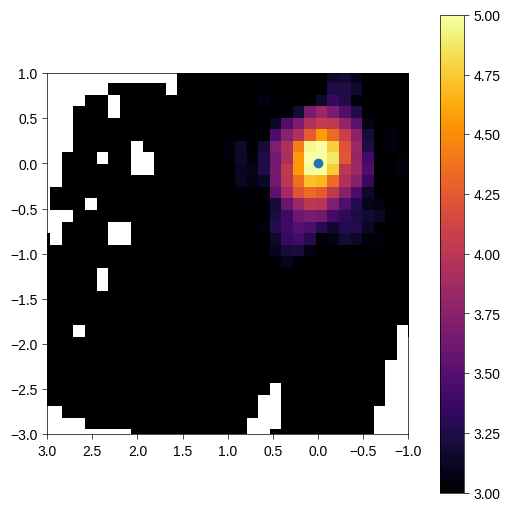

In [10]:
hdu_cont_long = fits.open('cont_long.fits')[0]
head_cont_long = hdu_cont_long.header
dat_cont_long = hdu_cont_long.data
pix_cont_long = head_cont_long['CDELT2']*3600
wcs_cont_long = WCS(head_cont_long)

ny, nx = head_cont_long["NAXIS2"], head_cont_long["NAXIS1"]

# Generate pixel indices for X and Y axes
x_pixels = np.arange(nx)  # Column indices
y_pixels = np.arange(ny)  # Row indices

# Convert to RA, Dec
ra_array, _ = wcs_cont_long.pixel_to_world_values(x_pixels, np.ones(nx))
_, dec_array = wcs_cont_long.pixel_to_world_values(np.ones(ny), y_pixels)

if ra_array[0]<0:
    ra_array+=360


x_cont_long = (ra_array-alma_max_radec[0])*3600
y_cont_long = (dec_array-alma_max_radec[1])*3600


fig, ax = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)

plt.imshow(np.log10(dat_cont_long), origin='lower', cmap='inferno', extent=[x_cont_long[0], x_cont_long[-1], y_cont_long[0], y_cont_long[-1]], vmin=3, vmax=5)
plt.colorbar()
plt.xlim(3, -1)
plt.ylim(-3, 1)
plt.scatter(0, 0)


In [11]:
new_wcs = WCS(naxis=2)
new_wcs.wcs.crpix = [300, 300]  # Set reference pixel at the center
new_wcs.wcs.crval = [alma_max_skycoord.ra.value, alma_max_skycoord.dec.value]  # New center position
new_wcs.wcs.ctype = ["RA---TAN", "DEC--TAN"]  # Keep TAN projection
new_wcs.wcs.cdelt = [-0.02/3600, 0.02/3600]  # Keep pixel scale but remove any flips
new_wcs.wcs.pc = np.identity(2)

regridded_H2, _ = reproject_interp((dat_H2_long, WCS(head_H2_long)), new_wcs, shape_out = (500, 500))
regridded_Fe, _ = reproject_interp((dat_Fe, WCS(head_Fe)), new_wcs, shape_out = (500, 500))
regridded_cont_short, _ = reproject_interp((np.log10(dat_cont_short), wcs_cont_short), new_wcs, shape_out = (500, 500))
regridded_cont_long, _ = reproject_interp((dat_cont_long, WCS(head_cont_long)), new_wcs, shape_out = (500, 500))
regridded_CO_taper, _ = reproject_interp((dat_CO_taper, wcs_CO_taper), new_wcs, shape_out = (500, 500))


/tmp/ipykernel_4050704/1993661697.py:10: RuntimeWarning: divide by zero encountered in log10
  regridded_cont_short, _ = reproject_interp((np.log10(dat_cont_short), wcs_cont_short), new_wcs, shape_out = (500, 500))


In [12]:
def limits(arr, cut=1):
    arr_1d = np.reshape(arr, -1)
    arr_1d = arr_1d[~np.isnan(arr_1d)]
    arr_1d = np.sort(arr_1d)
    return np.array([arr_1d[int(len(arr_1d)*cut/100)], arr_1d[-int(len(arr_1d)*cut/100)]])

def norm_img(arr, cut=1, *args):
    limits_img = limits(arr, cut)
    limits_img[0] = np.max([limits_img[0], 0])
    if len(args)==2:
        limits_img = args
    arr_out = arr.copy()
    for i in range(len(arr)):
        for j in range(len(arr[0])):
            if arr[i, j]<limits_img[0]:
                arr_out[i, j]=0
            elif arr[i, j]>limits_img[1]:
                arr_out[i, j]=1
            else:
                arr_out[i, j] = (arr[i, j]-limits_img[0])/(limits_img[1]-limits_img[0])
                

    return arr_out

In [13]:
norm_regridded_Fe = norm_img(regridded_Fe, 1, 1000, 6000)
#norm_regridded_Fe = norm_img(regridded_Fe, 1, 2.5, 4.2)
#norm_regridded_H2 = norm_img(regridded_H2, 1, 10, 80)
norm_regridded_H2 = norm_img(regridded_H2, 1, 100, 500)

norm_regridded_Fe = np.nan_to_num(norm_regridded_Fe)
norm_regridded_H2 = np.nan_to_num(norm_regridded_H2)

#norm_regridded_cont_short = norm_img(regridded_cont_short, 1, 10, 150)
norm_regridded_cont_short = norm_img(regridded_cont_short, 1, 1, 2.5)
norm_regridded_cont_long  = norm_img(regridded_cont_long,  1, 1e4, 1e5)

norm_regridded_cont_short = np.nan_to_num(norm_regridded_cont_short)
norm_regridded_cont_long  = np.nan_to_num(norm_regridded_cont_long)

#norm_regridded_CO_taper = norm_img(regridded_CO_taper, 1, 0, 1)
norm_regridded_CO_taper = norm_img(regridded_CO_taper, 1, 0.03, 0.15)
norm_regridded_CO_taper  = np.nan_to_num(norm_regridded_CO_taper)

norm_regridded_cont_long = norm_img(np.log10(regridded_cont_long), 1, 4, 5)
norm_regridded_cont_long  = np.nan_to_num(norm_regridded_cont_long)


/tmp/ipykernel_4050704/2522887957.py:20: RuntimeWarning: invalid value encountered in log10
  norm_regridded_cont_long = norm_img(np.log10(regridded_cont_long), 1, 4, 5)


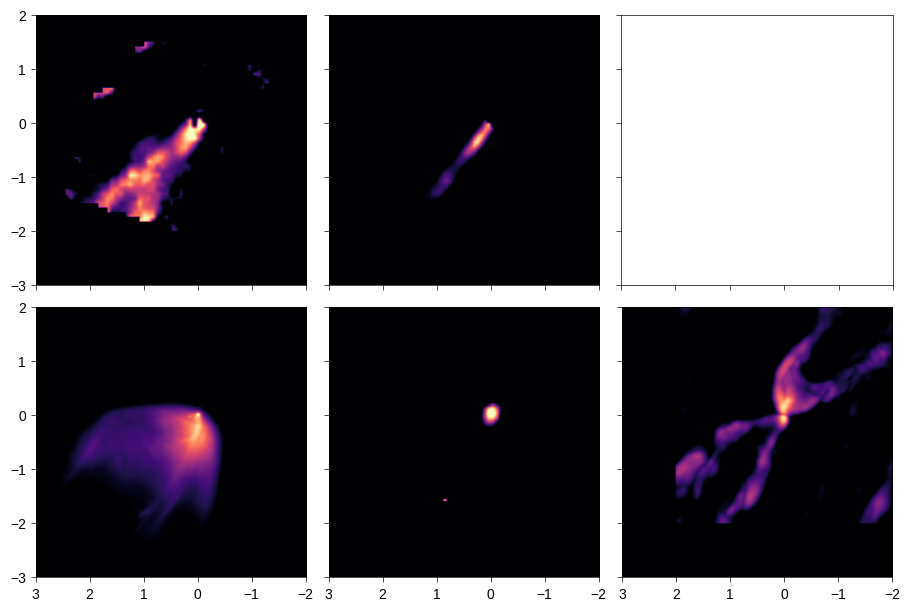

In [14]:
fig, axs = plt.subplots(2, 3, figsize=(9, 6), constrained_layout=True, sharex=True, sharey=True)

axs[0][0].imshow(norm_regridded_H2, origin='lower', cmap='magma', vmin=0, vmax=1, extent=[3, -2, -3, 2])
axs[0][1].imshow(norm_regridded_Fe, origin='lower', cmap='magma', vmin=0, vmax=1, extent=[3, -2, -3, 2])
axs[1][0].imshow(norm_regridded_cont_short, origin='lower', cmap='magma', vmin=0, vmax=1, extent=[3, -2, -3, 2])
axs[1][1].imshow(norm_regridded_cont_long, origin='lower', cmap='magma', vmin=0, vmax=1, extent=[3, -2, -3, 2])

#axs[0][2].imshow(norm_regridded_CO_small, origin='lower', cmap='magma', vmin=0, vmax=1, extent=[3, -2, -3, 2])
axs[1][2].imshow(norm_regridded_CO_taper, origin='lower', cmap='magma', vmin=0, vmax=1, extent=[3, -2, -3, 2])

In [15]:
def rot_para(A, angle):
    x = np.linspace(-200, 200, 1000)
    y = -A*x**2
    theta = np.radians(-angle)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    x_rot = cos_t * x - sin_t * y
    y_rot = sin_t * x + cos_t * y

    return x_rot+300, y_rot+300

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..4.789482242429034].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.5].


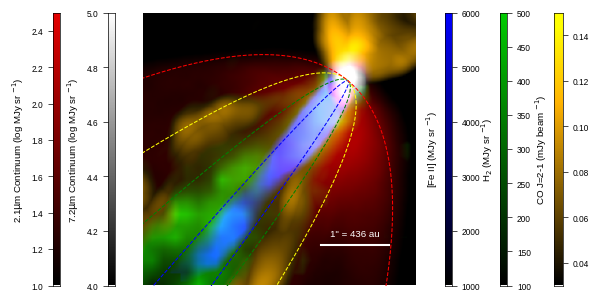

In [25]:
fig = plt.figure(figsize=(18/2.54, 18/2.54*0.5))
gs = gridspec.GridSpec(1, 6, width_ratios=[0.17, 0.17, 1, 0.17, 0.17, 0.17], wspace=0.1)

# Main square axis
ax_main = fig.add_subplot(gs[0, 2])

H2_img = norm_regridded_H2[:, :, np.newaxis]*np.array([0, 1, 0])*0.8
Fe_img = norm_regridded_Fe[:, :, np.newaxis]*np.array([144, 19, 254])*5/255
Fe_img = norm_regridded_Fe[:, :, np.newaxis]*np.array([0, 0, 1])*5
cont_short_img = norm_regridded_cont_short[:, :, np.newaxis]*np.array([1 ,0, 0])*0.9
cont_long_img  = norm_regridded_cont_long[:, :, np.newaxis]*np.array([1, 1, 1])
CO_taper_img = norm_regridded_CO_taper[:, :, np.newaxis]*np.array([1, 0.7, 0])*1.5

# Plot one dataset as example
im1 = ax_main.imshow(np.maximum.reduce([H2_img, Fe_img, cont_short_img, cont_long_img, CO_taper_img]), origin='lower')

ax_main.set_xlim(150, 350)
ax_main.set_ylim(150, 350)
ax_main.set_axis_off()

ax_main.plot([280, 330], [180, 180], c='w')
ax_main.text(305, 185, '1" = 436 au', fontsize=7, color='w', ha='center', va='bottom')

#plt.scatter(300, 300, color='r', s=100, marker='x')
#plt.plot([250, 305], [150, 290], c='w', ls='--')

xx, yy = rot_para(0.12, 43)
ax_main.plot(xx, yy, c='g', ls='--', lw=0.75)

xx, yy = rot_para(0.7, 38.8)
ax_main.plot(xx, yy, c='b', ls='--', lw=0.75)

xx, yy = rot_para(0.030, 45)
ax_main.plot(xx, yy, c='yellow', ls='--', lw=0.75)

xx, yy = rot_para(0.007, 40)
ax_main.plot(xx, yy, c='r', ls='--', lw=0.75)
#----------------------------------------------------------------------------

cax1 = fig.add_subplot(gs[0, 0])
cax2 = fig.add_subplot(gs[0, 1])
cax3 = fig.add_subplot(gs[0, 3])
cax4 = fig.add_subplot(gs[0, 4])
cax5 = fig.add_subplot(gs[0, 5])

caxs = [cax1, cax2, cax3, cax4, cax5]
caxs_left = [cax1, cax2]
caxs_right = [cax3, cax4, cax5]

aa = np.linspace(1, 0, 100)
# cont_short
bb = aa[:, np.newaxis, np.newaxis]*np.array([1 ,0, 0])*0.9
cax1.imshow(bb, extent=[0, 10/400*1.5, 1, 2.5])
cax1.set_ylabel(r'2.1$\rm \mu$m Continuum (log MJy sr $^{-1}$)', fontsize=7)

# cont_long
bb = aa[:, np.newaxis, np.newaxis]*np.array([1, 1, 1])
cax2.imshow(bb, extent=[0, 10/400*1, 4, 5])
cax2.set_ylabel(r'7.2$\rm \mu$m Continuum (log MJy sr $^{-1}$)', fontsize=7)


# Fe
bb = aa[:, np.newaxis, np.newaxis]*np.array([0, 0, 1])
cax3.imshow(bb, extent=[0, 10/400*5000, 1000, 6000])
cax3.set_ylabel('[Fe II] (MJy sr $^{-1}$)', fontsize=7)

# H2
bb = aa[:, np.newaxis, np.newaxis]*np.array([0, 1, 0])*0.8
cax4.imshow(bb, extent=[0, 10, 100, 500])
cax4.set_ylabel('H$_2$ (MJy sr $^{-1}$)', fontsize=7)

# CO
bb = aa[:, np.newaxis, np.newaxis]*np.array([1, 0.7, 0])*1.5
cax5.imshow(bb, extent=[0, 10/400*0.15, 0.03, 0.15])
cax5.set_ylabel('CO J=2-1 (mJy beam $^{-1}$)', fontsize=7)


for cax in caxs_right:
    cax.tick_params(axis='y', right=True, left=False, labelright=True, labelleft=False)

for cax in caxs:
    cax.set_xticks(ticks=[])
    cax.tick_params(labelsize=6)


fig.set_size_inches(18/2.54, 18/2.54*0.5)

plt.savefig('Final_Fig4.pdf', bbox_inches=None)